**Projekt szkoleniowy z regresji liniowej: Klienci e-commerce**

W tym projekcie pracujemy z zestawem danych dostępnym na Kaggle. Dane zawierają informacje o klientach serwisu e-commerce, w tym:

- *Ang. Session Length:* Średni czas trwania sesji w sklepie.
- *Time on App*: Średni czas spędzony w aplikacji (w minutach).
- *Time on Website*: Średni czas spędzony na stronie internetowej (w minutach).
- *Length of Membership*: Liczba lat, od jakich klient jest członkiem.

W tym projekcie zakładamy, że firma stara się zdecydować, czy skupić swoje wysiłki na ulepszaniu aplikacji mobilnej, czy strony internetowej. Naszym celem jest pomoc w podjęciu decyzji opartej na danych.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
customers = pd.read_csv('../data/ecommerce_customers')

In [5]:
customers.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\r\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\r\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\r\nCobbborough,...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\r\nPort Jason, OH 22070-...",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\r\nPort Jacobville, PR...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [6]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [7]:
customers.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


1. **count** – Liczba obserwacji w każdej kolumnie (tutaj wszędzie 500), co oznacza brak brakujących wartości.

2. **mean** (średnia) – Wartość średnia dla każdej kolumny:
   - Średnia długość sesji: 33.05
   - Czas spędzony w aplikacji: 12.05 minut
   - Czas spędzony na stronie internetowej: 37.06 minut
   - Czas trwania członkostwa: 3.53 lat
   - Roczna średnia długość spędzona: 499.31
   
   Średnie wartości dają ogólne pojęcie o przeciętnych nawykach i wydatkach klientów.

3. **std** (odchylenie standardowe) – Informuje o rozproszeniu danych wokół średniej:
   - Wartości standardowe są stosunkowo niskie, co oznacza, że dane nie są bardzo zróżnicowane, np. `Avg. Session Length` oscyluje blisko średniej, podobnie jak pozostałe wartości.
   
4. **min oraz max** – Zakres wartości dla każdej kolumny, np.:
   - `Avg. Session Length` ma zakres od 29.53 do 36.13, co pokazuje, że długości sesji są dość zbliżone między klientami.
   - Roczna kwota wydana (Yearly Amount Spent) jest najbardziej rozproszona (od 256.67 do 765.52), co może sugerować różnice w wydatkach między klientami.

5. **Percentyle (25%, 50%, 75%)** – Informacje o rozkładzie danych:
   - **25% i 75%**: pokazują kwartyle, czyli wartości poniżej których znajduje się odpowiednio 25% i 75% danych, co może sugerować rozkład i ewentualne skrajności.
   - **50%** (mediana): Jest mniej wrażliwa na wartości odstające, więc jeśli różni się znacznie od średniej, może sygnalizować asymetryczny rozkład (tutaj jest zbliżona do średniej w większości kolumn).

Ogólnie `pd.describe()` dostarcza cennych informacji o podstawowej charakterystyce zbioru danych, umożliwiając szybkie rozpoznanie rozkładu wartości, potencjalnych wartości odstających i ogólnego trendu. W kontekście projektu e-commerce pozwala określić, jak różnorodne są nawyki klientów, np. czy użytkownicy spędzają więcej czasu w aplikacji lub na stronie oraz jakie są wzorce wydatków.

## **EDA**

Najpierw zadajemy następujące pytanie: W jaki sposób czas spędzony przez klienta na każdej platformie jest powiązany z czasem, który spędza rocznie?

Wydaje się, że nie ma dużej korelacji między czasem spędzonym na stronie desktopowej a kwotą, jaką klienci wydają rocznie. Z drugiej strony, drugi wykres pokazuje, że wydaje się istnieć niewielka korelacja między czasem spędzonym w aplikacji a rocznymi wydatkami. Wynika to prawdopodobnie z faktu, że ci klienci spędzają mniej czasu na przeglądaniu stron na telefonie. Być może proces płatności jest szybszy w aplikacji lub wezwania do działania są tam bardziej skuteczne.

Po przeanalizowaniu wykresu parami widzimy, że istnieje jedna duża dodatnia korelacja między dwiema zmiennymi: długością członkostwa i rocznymi wydatkami. Na koniec przekształcamy ten wykres, aby zwizualizować linię regresji.

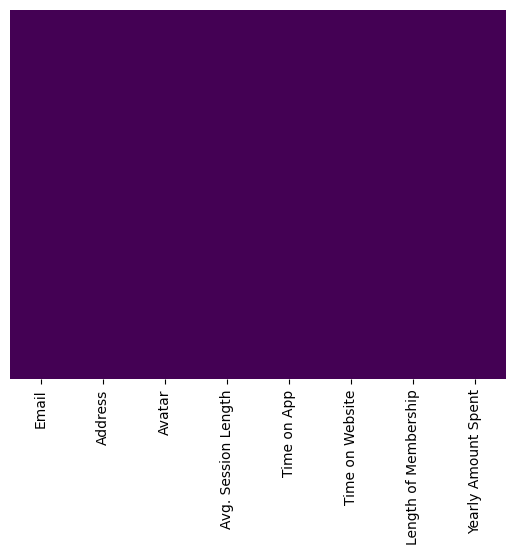

In [8]:
sns.heatmap(customers.isnull(), yticklabels=False, cbar=False, cmap='viridis');

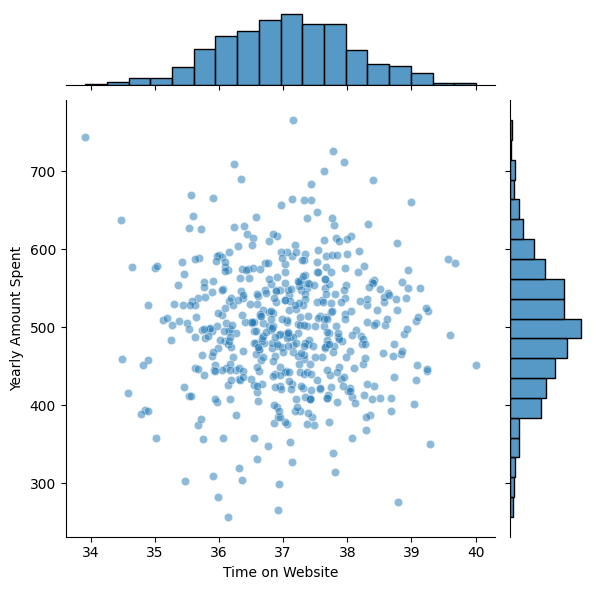

In [11]:
# time on website vs yearly amount spent
sns.jointplot(x='Time on Website', y='Yearly Amount Spent', data=customers, alpha=0.5)

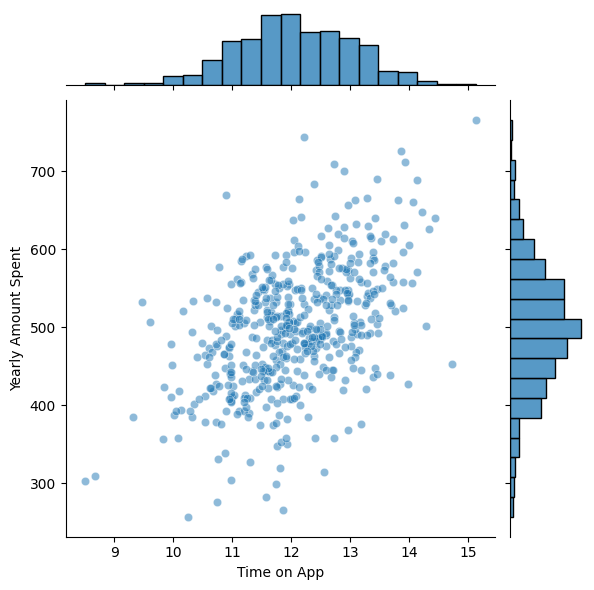

In [12]:
sns.jointplot(x='Time on App', y='Yearly Amount Spent', data=customers, alpha=0.5)

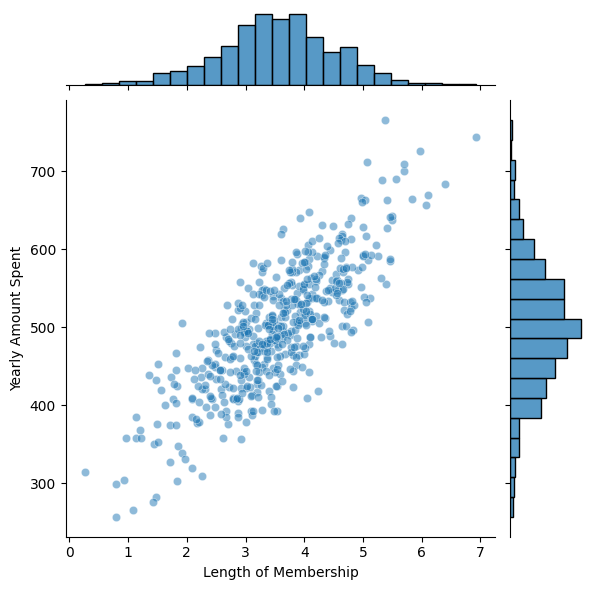

In [13]:
sns.jointplot(x='Length of Membership', y='Yearly Amount Spent', data=customers, alpha=0.5)

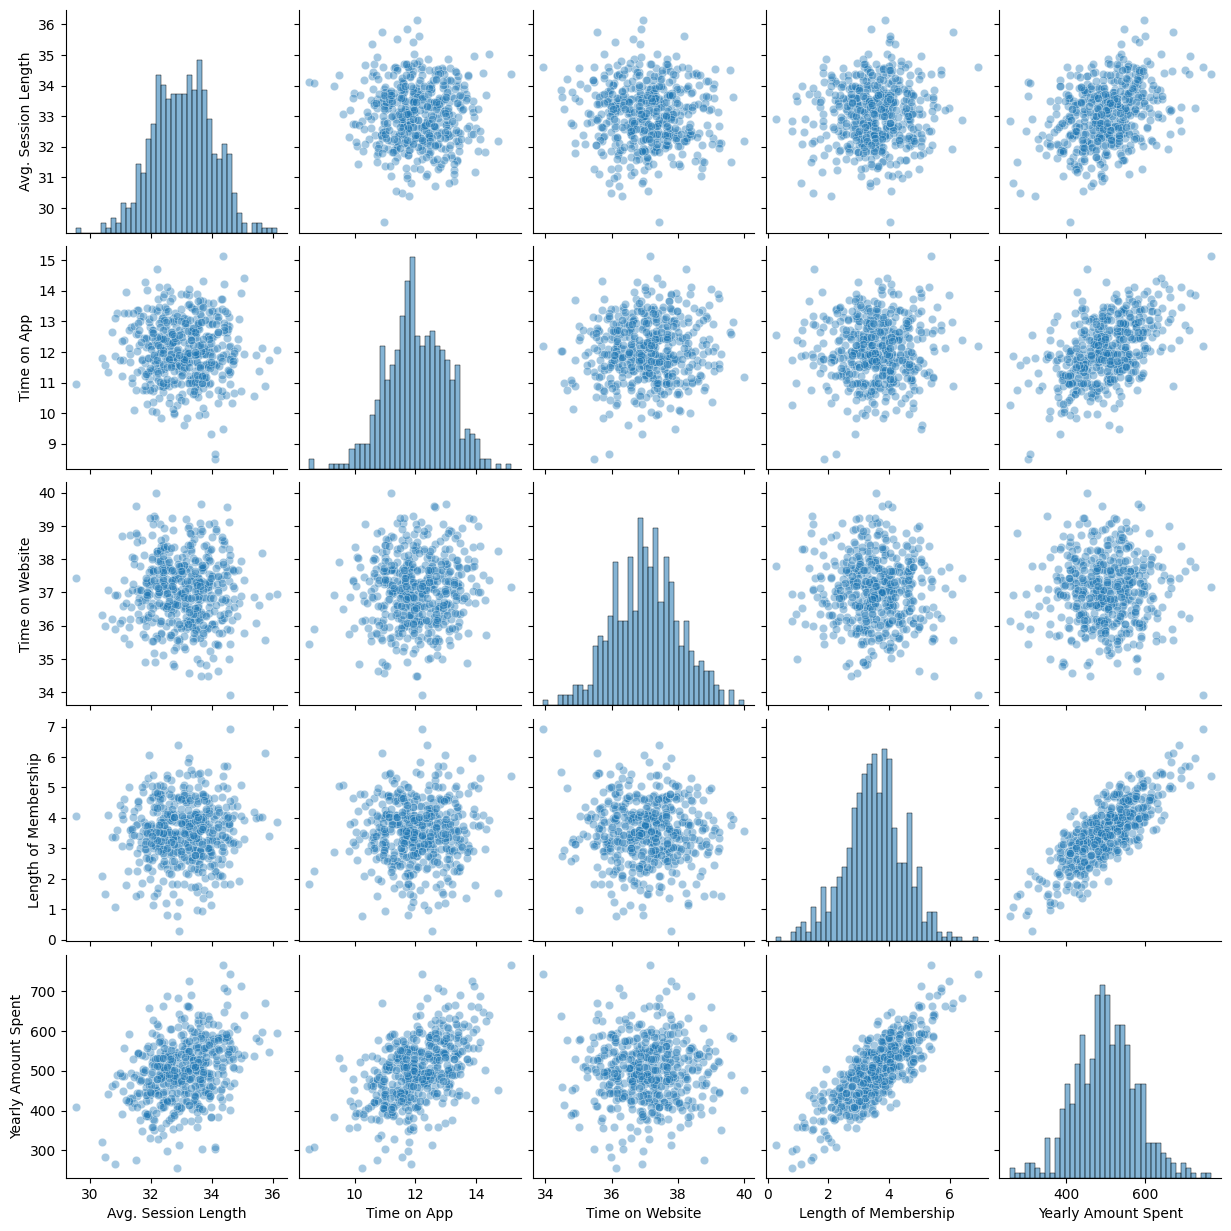

In [17]:
# Wywołujemy funkcję `pairplot` z Seaborn, aby stworzyć wykresy par zmiennych w zbiorze danych.
sns.pairplot(customers,
             # Określamy zbiór danych, który chcemy zwizualizować. 
             # `customers` to nasz DataFrame, na którym wykonujemy wykres parowy.
             kind='scatter', 
             # Ustawiamy `kind` na 'scatter', co oznacza, że na wykresie parowym będą użyte wykresy punktowe.
             plot_kws={'alpha':0.4}, 
             # Przekazujemy argument `plot_kws`, czyli parametry dla każdego wykresu punktowego.
             # `alpha` kontroluje przezroczystość punktów, ustawiamy ją na 0.4, co zmniejsza widoczność nakładających się punktów.
             diag_kws={'alpha':0.55, 'bins':40})
             # Przekazujemy argument `diag_kws`, czyli parametry dla wykresów na przekątnych (histogramów).
             # `alpha` jest ustawione na 0.55, aby histogramy były nieco mniej przezroczyste.
             # `bins` jest ustawione na 40, co oznacza, że histogramy będą miały 40 słupków (przedziałów).


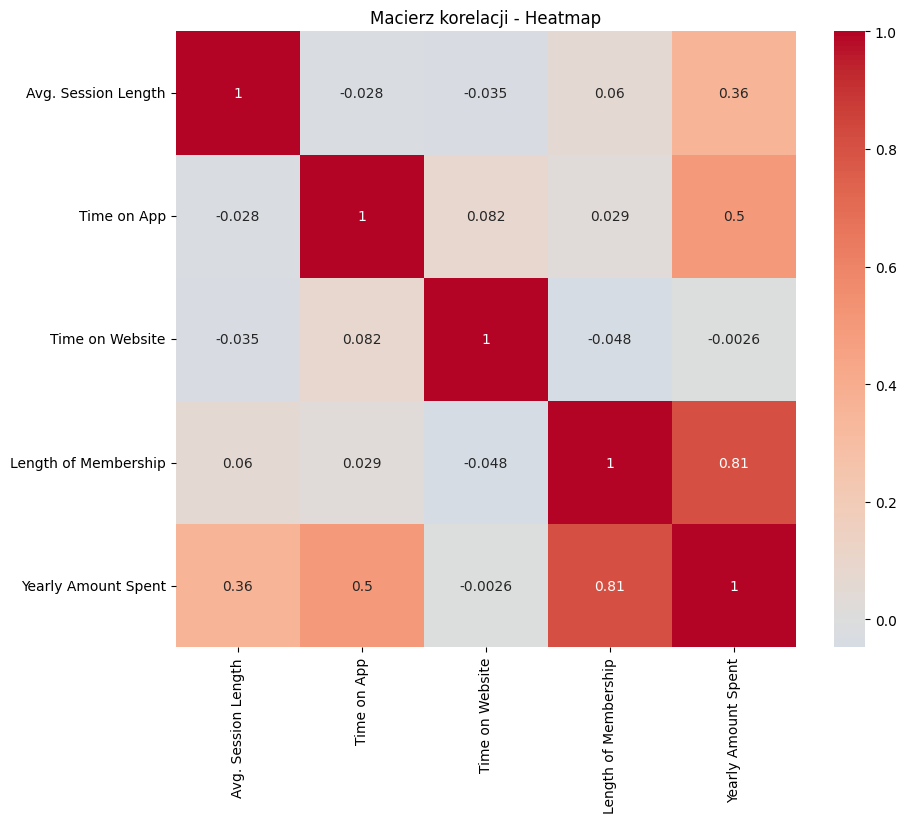

In [23]:
# Wybieramy tylko kolumny numeryczne
numerical_columns = customers.select_dtypes(include=['float', 'int'])

# Obliczamy macierz korelacji dla wybranych kolumn
correlation_matrix = numerical_columns.corr()

# Tworzymy mapę cieplną dla macierzy korelacji
plt.figure(figsize=(10, 8))  # Ustawiamy rozmiar wykresu
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", center=0)
plt.title("Macierz korelacji - Heatmap")
plt.show()


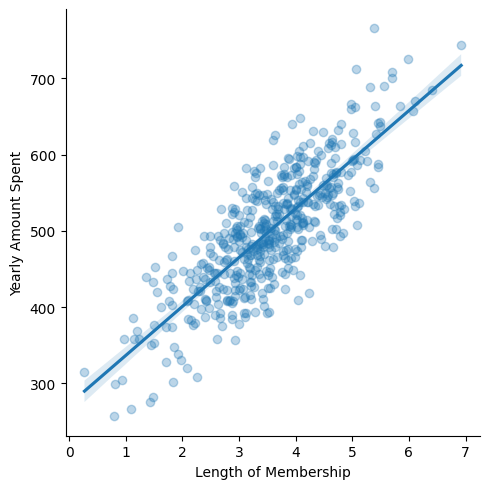

In [6]:
# length of membership vs yearly amount spent
sns.lmplot(x='Length of Membership', 
           y='Yearly Amount Spent', 
           data=customers,
           scatter_kws={'alpha':0.3})

In [7]:
correlation = customers['Length of Membership'].corr(customers['Yearly Amount Spent'])
print("Korelacja Pearsona:", correlation)

Korelacja Pearsona: 0.8090835682475813


Linia regresji liniowej minimalizuje odległość do punktów danych, ale precyzyjnie mówiąc, minimalizuje **sumę kwadratów pionowych odległości** między linią a każdym punktem danych.

Oznacza to, że:
1. **Regresja liniowa** dąży do znalezienia takiej linii, która minimalizuje różnice między przewidywaną wartością na linii a rzeczywistą wartością punktów danych.
2. Używa **metody najmniejszych kwadratów** – czyli sumy kwadratów różnic między rzeczywistymi wartościami (punktami danych) a wartościami przewidywanymi przez linię.

Czyli:
- Linia regresji liniowej nie minimalizuje bezpośrednio dystansu w sensie geometrycznym (np. odległości euklidesowej), ale minimalizuje sumę kwadratów odchyleń w pionie (na osi Y).

I np. może nam to pozwolić przewidzieć ile rocznie wyda osoba, która jest członkiem od 7 miesięcy.

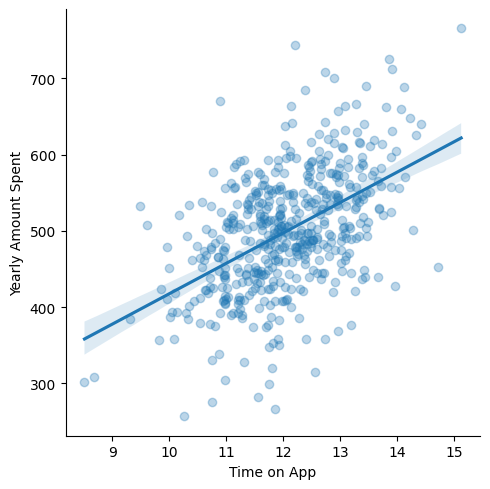

In [25]:
# time on app vs yearly amount spent
sns.lmplot(x='Time on App', 
           y='Yearly Amount Spent', 
           data=customers,
           scatter_kws={'alpha':0.3})

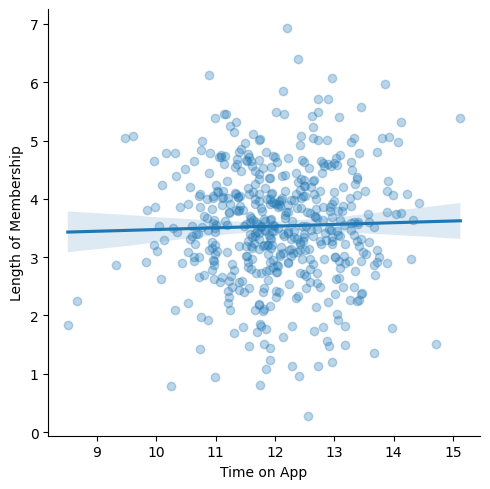

In [27]:
# time on app vs yearly amount spent
sns.lmplot(x='Time on App', 
           y='Length of Membership', 
           data=customers,
           scatter_kws={'alpha':0.3})

In [42]:
correlation = customers['Length of Membership'].corr(customers['Time on App'])
print("Korelacja Pearsona:", correlation)

Korelacja Pearsona: 0.029142563136158532


## Splitting the data

In [2]:
from sklearn.model_selection import train_test_split

In [16]:
X = customers['Time on App']
X

0      12.655651
1      11.109461
2      11.330278
3      13.717514
4      12.795189
         ...    
495    13.566160
496    11.695736
497    11.499409
498    12.391423
499    12.418808
Name: Time on App, Length: 500, dtype: float64

Tworzymy dataset ze wszystkimi `predictive variables` - czyli tymi, których będziemy używać do predykcji.

In [19]:
X = customers[['Avg. Session Length', 'Time on App', 'Time on Website', 'Length of Membership']]
X

,Avg. Session Length,Time on App,Time on Website,Length of Membership
0,34.497268,12.655651,39.577668,4.082621
1,31.926272,11.109461,37.268959,2.664034
2,33.000915,11.330278,37.110597,4.104543
3,34.305557,13.717514,36.721283,3.120179
4,33.330673,12.795189,37.536653,4.446308
...,...,...,...,...
495,33.237660,13.566160,36.417985,3.746573
496,34.702529,11.695736,37.190268,3.576526
497,32.646777,11.499409,38.332576,4.958264
498,33.322501,12.391423,36.840086,2.336485


Oraz oczywiście `target variable` - czyli ten, których chcemy "przewidzieć"

In [20]:
y = customers['Yearly Amount Spent']
y

0      587.951054
1      392.204933
2      487.547505
3      581.852344
4      599.406092
          ...    
495    573.847438
496    529.049004
497    551.620145
498    456.469510
499    497.778642
Name: Yearly Amount Spent, Length: 500, dtype: float64

```python

train_test_split(predictors, target, size of testing section, random number that enables reproducing the exact split)

```

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [22]:
X_train

,Avg. Session Length,Time on App,Time on Website,Length of Membership
5,33.871038,12.026925,34.476878,5.493507
116,33.925795,12.011022,36.701052,2.753424
45,34.555768,12.170525,39.131097,3.663105
16,32.125387,11.733862,34.894093,3.136133
462,33.503810,11.233415,37.211153,2.320550
...,...,...,...,...
106,32.291756,12.190474,36.152462,3.781823
270,34.006489,12.956277,38.655095,3.275734
348,31.812483,10.886921,34.897828,3.128639
435,32.259973,14.132893,37.023479,3.762070


In [23]:
y_train

5      637.102448
116    479.231093
45     549.860590
16     457.847696
462    397.420584
          ...    
106    494.551861
270    540.995739
348    392.810345
435    571.216005
102    420.737673
Name: Yearly Amount Spent, Length: 350, dtype: float64

## Train the model

In [24]:
from sklearn.linear_model import LinearRegression

In [27]:
lm = LinearRegression()

In [28]:
lm.fit(X_train, y_train)

LinearRegression()

In [29]:
lm.coef_

array([25.72425621, 38.59713548,  0.45914788, 61.67473243])

W regresji liniowej współczynniki (ang. coefficients, oznaczane jako `lm.coef_` w modelu) to liczby, które określają wpływ każdej zmiennej niezależnej (predyktora) na zmienną zależną (wynikową). Współczynniki są kluczowe, ponieważ pokazują, jak zmiana wartości zmiennej niezależnej wpływa na wartość przewidywaną przez model.

* Wartość współczynnika dla każdej zmiennej mówi, o ile jednostek zmienia się wartość przewidywana (y), gdy wartość tej zmiennej niezależnej wzrasta o 1, przy założeniu, że pozostałe zmienne są stałe.

* Dodatni współczynnik oznacza, że zmienna niezależna ma pozytywny wpływ na wynik (tzn. gdy wartość zmiennej rośnie, wartość przewidywana również rośnie).

* Ujemny współczynnik oznacza, że zmienna niezależna ma negatywny wpływ na wynik (tzn. gdy wartość zmiennej rośnie, wartość przewidywana maleje).

In [31]:
cdf = pd.DataFrame(lm.coef_, X.columns, columns=['Coeff']) # wyższy coeff to ważniejsza zmienna
cdf

,Coeff
Avg. Session Length,25.724256
Time on App,38.597135
Time on Website,0.459148
Length of Membership,61.674732


## Try your model

In [32]:
predictions = lm.predict(X_test) # przewidywane wartości

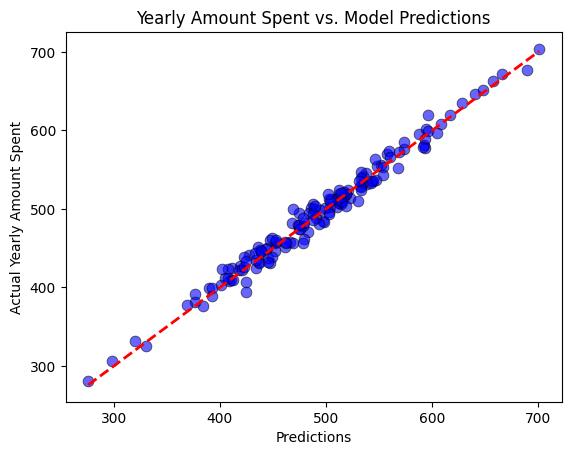

In [38]:
# Tworzymy wykres punktowy, aby porównać rzeczywiste wartości (y_test) z przewidywaniami modelu (predictions).
sns.scatterplot(x=y_test, y=predictions, 
                # Ustawiamy kolor punktów na niebieski, aby były wyraźnie widoczne.
                color='blue', 
                # Ustawiamy przezroczystość (alpha) na 0.6, co pomaga zobaczyć nakładające się punkty.
                alpha=0.6, 
                # Dodajemy czarne obramowanie do punktów (edgecolor='k'), aby były bardziej czytelne.
                edgecolor='k', 
                # Ustawiamy rozmiar punktów na 60, aby były dobrze widoczne na wykresie.
                s=60)

# Dodanie linii odniesienia (y = x), aby pokazać idealne możliwe przewidywania
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)

# Labels and title
plt.xlabel('Predictions')
plt.ylabel('Actual Yearly Amount Spent')
plt.title('Yearly Amount Spent vs. Model Predictions')
plt.show()


## Evaluate how your model performed

In [39]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

In [40]:
print('Mean Absolute Error:',mean_absolute_error(y_test, predictions))
print('Mean Squared Error:',mean_squared_error(y_test, predictions))
print('Root Mean Squared Error:',math.sqrt(mean_squared_error(y_test, predictions)))

Mean Absolute Error: 8.426091641432068
Mean Squared Error: 103.9155413650325
Root Mean Squared Error: 10.193897260863114


Pamiętaj, że te miary są **zależne od skali danych**, więc ich wartości mogą się znacznie różnić w zależności od tego, co przewiduje model.

### Mean Absolute Error (MAE)

> * Jest to średnia absolutnych różnic między rzeczywistymi a przewidywanymi wartościami.<br>
> * MAE mierzy średnią wielkość błędu bez względu na jego kierunek.<br>
> * MAE jest wyrażany w tych samych jednostkach co dane wyjściowe, co ułatwia interpretację.

- **Zakres**: od 0 do ∞
  - **0** – Idealne dopasowanie (brak błędu).
  - Im wyższa wartość MAE, tym większy błąd średni bezwzględny.
- **Interpretacja**: Wartość MAE daje średnią wielkość błędu w tych samych jednostkach co dane. 

### Mean Squared Error (MSE)

> * Jest to średnia kwadratów różnic między rzeczywistymi a przewidywanymi wartościami.<br>
> * MSE jest bardziej wrażliwe na duże błędy (ponieważ różnice są podnoszone do kwadratu), co sprawia, że jest użyteczne, jeśli chcemy szczególnie karać duże błędy.
> 
- **Zakres**: od 0 do ∞
  - **0** – Idealne dopasowanie.
  - Wyższe wartości oznaczają większe błędy.
- **Interpretacja**: MSE silnie penalizuje duże błędy, ponieważ różnice są podnoszone do kwadratu. Dlatego model o niskim MSE będzie miał mniejsze błędy, zwłaszcza duże.

### Root Mean Squared Error (RMSE)
- **Zakres**: od 0 do ∞
  - **0** – Idealne dopasowanie.
  - Wyższe wartości wskazują na większy błąd.
- **Interpretacja**: RMSE jest w tych samych jednostkach co dane, więc może być bardziej intuicyjny w interpretacji niż MSE. Wyższe wartości RMSE oznaczają większy błąd, a niskie wartości wskazują na lepsze dopasowanie modelu do danych.

### Ogólne zasady dotyczące wartości błędu
- **Idealne dopasowanie**: MAE, MSE, i RMSE równe 0 oznaczają, że model idealnie przewiduje dane.
- **Akceptowalny zakres błędów**: Wartości MAE i RMSE, które są stosunkowo małe w porównaniu do skali danych wyjściowych, sugerują, że model dobrze sobie radzi. W praktyce, akceptowalny zakres zależy od specyfiki problemu:
  - Na przykład, w przypadku przewidywania cen domów, MAE rzędu kilkuset dolarów może być akceptowalny, ale dla przewidywania temperatury błędy tego samego rzędu byłyby zbyt duże.
  
**W skrócie**:
- Im niższe wartości MAE, MSE i RMSE, tym lepszy jest model.

## Residuals
czyli reszty, to po prostu różnice między rzeczywistymi wartościami a wartościami przewidywanymi przez model.

In [47]:
residuals = y_test-predictions

In [48]:
residuals # powinny być randomowe

361    -2.636795
73     -7.800375
374    -8.463174
155     1.953775
104    -0.051825
         ...    
266    10.327176
23     15.027984
222   -16.778237
261    -6.021734
426    -4.371832
Name: Yearly Amount Spent, Length: 150, dtype: float64

<Axes: xlabel='Yearly Amount Spent', ylabel='Count'>

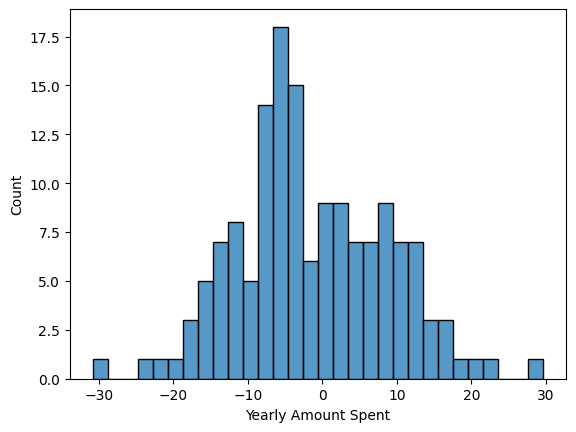

In [51]:
sns.histplot(residuals, bins=30)

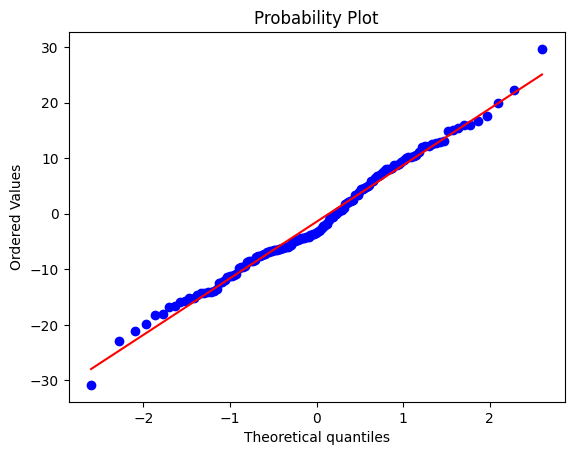

In [44]:
import pylab 
import scipy.stats as stats

stats.probplot(residuals, dist="norm", plot=pylab)
pylab.show()

### Co możemy z tego wywnioskować?
1. **Rozkład reszt**: Histogram pokazuje, że większość reszt jest skupiona blisko zera, co oznacza, że model dobrze dopasowuje się do danych w większości przypadków.
   
2. **Symetria wokół zera**: Jeśli reszty są symetryczne i rozłożone w kształcie zbliżonym do rozkładu normalnego (dzwonowego), to sugeruje, że model dobrze opisuje dane. Na tym wykresie widzimy pewną symetrię, co jest dobrym znakiem.
   
3. **Zakres reszt**: Większość reszt mieści się w przedziale od około -20 do +20. To oznacza, że błędy modelu (różnice między przewidywaniami a rzeczywistością) są zazwyczaj w tym zakresie. Mniejsze wartości wskazują na lepsze dopasowanie modelu.

### Podsumowanie
Ten histogram sugeruje, że:
- Model dobrze dopasowuje się do danych, ponieważ większość reszt jest blisko zera.
- Wykres jest dość symetryczny wokół zera, co wskazuje na poprawność modelu regresji liniowej.
- Sporadyczne reszty dalsze od zera mogą wskazywać na punkty, które model trudniej przewiduje dokładnie, ale ogólnie rozkład reszt jest korzystny.

## Conclusions

Zgodnie z modelem, najważniejszym czynnikiem dla klientów nie jest czas spędzony w aplikacji lub na stronie internetowej, ale długość ich członkostwa. Jednak z dwóch predyktorów (desktop vs aplikacja), aplikacja ma zdecydowanie najsilniejszy wpływ. W rzeczywistości czas spędzony na stronie internetowej nie wydaje się mieć żadnej korelacji! Innymi słowy, zgodnie z danymi, ilość czasu spędzonego przez klienta na stronie stacjonarnej nie ma prawie nic wspólnego z ilością pieniędzy, które wyda.